### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.linear_model import LinearRegression

### Importing Data

In [2]:
import opendatasets as od
od.download ("https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis?select=DataCoSupplyChainDataset.csv")

Skipping, found downloaded files in ".\dataco-smart-supply-chain-for-big-data-analysis" (use force=True to force download)


In [3]:
data = pd.read_csv("./dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv", encoding='latin1')

In [4]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


### Data Preprocessing

In [7]:
data.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [8]:
# Drop Unrelevant Columns
data=data.drop(['Type',
                'Days for shipping (real)',
                'Days for shipment (scheduled)',
                'Delivery Status',
                'Late_delivery_risk',
                'Category Id',
                'Customer City',
                'Customer Country',
                'Customer Email',
                'Customer Fname',
                'Customer Id',
                'Customer Lname',
                'Customer Password',
                'Customer Segment',
                'Customer State',
                'Customer Street',
                'Customer Zipcode',
                'Department Id',
                'Latitude',
                'Longitude',
                'Order City', 
                'Order Country', 
                'Order Customer Id',
                'Order Id', 
                'Order Item Cardprod Id',
                'Order Item Id',
                'Order Region', 
                'Order State', 
                'Order Status',
                'Order Zipcode', 
                'Product Card Id', 
                'Product Category Id',
                'Product Description', 
                'Product Image', 
                'Product Name', 
                'Product Status', 
                'shipping date (DateOrders)', 
                'Shipping Mode'], axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Benefit per order         180519 non-null  float64
 1   Sales per customer        180519 non-null  float64
 2   Category Name             180519 non-null  object 
 3   Department Name           180519 non-null  object 
 4   Market                    180519 non-null  object 
 5   order date (DateOrders)   180519 non-null  object 
 6   Order Item Discount       180519 non-null  float64
 7   Order Item Discount Rate  180519 non-null  float64
 8   Order Item Product Price  180519 non-null  float64
 9   Order Item Profit Ratio   180519 non-null  float64
 10  Order Item Quantity       180519 non-null  int64  
 11  Sales                     180519 non-null  float64
 12  Order Item Total          180519 non-null  float64
 13  Order Profit Per Order    180519 non-null  f

##### Data Transformation

In [10]:
data['Order Date'] = pd.to_datetime(data['order date (DateOrders)']).dt.strftime('%Y-%m-%d')

print(data['Order Date'])

0         2018-01-31
1         2018-01-13
2         2018-01-13
3         2018-01-13
4         2018-01-13
             ...    
180514    2016-01-16
180515    2016-01-16
180516    2016-01-15
180517    2016-01-15
180518    2016-01-15
Name: Order Date, Length: 180519, dtype: object


##### Label Encoding

In [11]:
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [12]:
data_sales=data[['Benefit per order', 
                 'Sales per customer', 
                 'Category Name', 
                 'Department Name', 
                 'Market',
                 'Order Date',
                 'Order Item Discount', 
                 'Order Item Discount Rate', 
                 'Order Item Product Price', 
                 'Order Item Profit Ratio',
                 'Order Item Quantity', 
                 'Sales', 
                 'Order Item Total',
                 'Order Profit Per Order',
                 'Product Price']]

In [13]:
data_sales.head()

,Benefit per order,Sales per customer,Category Name,Department Name,Market,Order Date,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
0,91.250000,314.640015,Sporting Goods,Fitness,Pacific Asia,2018-01-31,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,327.75
1,-249.089996,311.359985,Sporting Goods,Fitness,Pacific Asia,2018-01-13,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,327.75
2,-247.779999,309.720001,Sporting Goods,Fitness,Pacific Asia,2018-01-13,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,327.75
3,22.860001,304.809998,Sporting Goods,Fitness,Pacific Asia,2018-01-13,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,327.75
4,134.210007,298.250000,Sporting Goods,Fitness,Pacific Asia,2018-01-13,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,327.75


In [14]:
features=data_sales.drop(columns=['Sales', 'Order Item Quantity', 'Order Item Product Price', 'Order Date'])
target=data_sales['Sales'].astype(str)
date=data_sales['Order Date']

In [15]:
features=features.apply(Labelencoder_feature)
features.head()

,Benefit per order,Sales per customer,Category Name,Department Name,Market,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Total,Order Profit Per Order,Product Price
0,18934,2568,40,4,3,426,4,140,2568,18934,62
1,2272,2559,40,4,3,498,5,44,2559,2272,62
2,2293,2555,40,4,3,529,6,44,2555,2293,62
3,13638,2546,40,4,3,600,7,119,2546,13638,62
4,20599,2526,40,4,3,682,8,156,2526,20599,62


In [16]:
final_features=features[['Benefit per order', 'Sales per customer', 'Category Name',
                         'Department Name', 'Market', 'Order Item Discount',
                         'Order Item Total', 'Order Profit Per Order',
                         'Product Price']]

final_features

,Benefit per order,Sales per customer,Category Name,Department Name,Market,Order Item Discount,Order Item Total,Order Profit Per Order,Product Price
0,18934,2568,40,4,3,426,2568,18934,62
1,2272,2559,40,4,3,498,2559,2272,62
2,2293,2555,40,4,3,529,2555,2293,62
3,13638,2546,40,4,3,600,2546,13638,62
4,20599,2526,40,4,3,682,2526,20599,62
...,...,...,...,...,...,...,...,...,...
180514,15208,2752,18,3,3,0,2752,15208,66
180515,422,2743,18,3,3,176,2743,422,66
180516,20768,2734,18,3,3,300,2734,20768,66
180517,21463,2725,18,3,3,404,2725,21463,66


##### Data Normalization

In [17]:
columns_to_normalize = ['Benefit per order', 'Sales per customer', 'Category Name', 'Department Name', 'Market', 'Order Item Discount', 'Order Item Total', 'Order Profit Per Order', 'Product Price']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to the specified columns
final_features[columns_to_normalize] = scaler.fit_transform(final_features[columns_to_normalize])

# Display the normalized DataFrame
final_features

C:\Users\User\AppData\Local\Temp\ipykernel_1820\1950626138.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_features[columns_to_normalize] = scaler.fit_transform(final_features[columns_to_normalize])


,Benefit per order,Sales per customer,Category Name,Department Name,Market,Order Item Discount,Order Item Total,Order Profit Per Order,Product Price
0,0.860754,0.877649,0.816327,0.4,0.75,0.419291,0.877649,0.860754,0.837838
1,0.103287,0.874573,0.816327,0.4,0.75,0.490157,0.874573,0.103287,0.837838
2,0.104241,0.873206,0.816327,0.4,0.75,0.520669,0.873206,0.104241,0.837838
3,0.619994,0.870130,0.816327,0.4,0.75,0.590551,0.870130,0.619994,0.837838
4,0.936446,0.863295,0.816327,0.4,0.75,0.671260,0.863295,0.936446,0.837838
...,...,...,...,...,...,...,...,...,...
180514,0.691367,0.940533,0.367347,0.3,0.75,0.000000,0.940533,0.691367,0.891892
180515,0.019184,0.937457,0.367347,0.3,0.75,0.173228,0.937457,0.019184,0.891892
180516,0.944129,0.934381,0.367347,0.3,0.75,0.295276,0.934381,0.944129,0.891892
180517,0.975724,0.931306,0.367347,0.3,0.75,0.397638,0.931306,0.975724,0.891892


In [18]:
final_data=pd.concat([final_features,target, date],axis=1)
final_data.columns

Index(['Benefit per order', 'Sales per customer', 'Category Name',
       'Department Name', 'Market', 'Order Item Discount', 'Order Item Total',
       'Order Profit Per Order', 'Product Price', 'Sales', 'Order Date'],
      dtype='object')

##### Feature Extraction

In [19]:
# Convert 'Order Date' to datetime format
final_data['Order Date'] = pd.to_datetime(final_data['Order Date'])

# Extract date features
final_data['Year'] = final_data['Order Date'].dt.year
final_data['Month'] = final_data['Order Date'].dt.month
final_data['Day'] = final_data['Order Date'].dt.day

In [20]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Benefit per order       180519 non-null  float64       
 1   Sales per customer      180519 non-null  float64       
 2   Category Name           180519 non-null  float64       
 3   Department Name         180519 non-null  float64       
 4   Market                  180519 non-null  float64       
 5   Order Item Discount     180519 non-null  float64       
 6   Order Item Total        180519 non-null  float64       
 7   Order Profit Per Order  180519 non-null  float64       
 8   Product Price           180519 non-null  float64       
 9   Sales                   180519 non-null  object        
 10  Order Date              180519 non-null  datetime64[ns]
 11  Year                    180519 non-null  int64         
 12  Month                   180519

### Data Splitting

In [21]:
# Split the data into training (2015-2017) and testing (2018) sets
train_data = final_data[final_data['Year'].between(2015, 2017)]
test_data = final_data[final_data['Year'] == 2018]

# Save the split datasets to CSV files
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

In [25]:
train_data = pd.read_csv('train.csv')

# Define features (X_train) and target variable (y_train)
# Assuming 'Sales' is the target variable and you want to use all other columns as features
X_train = train_data.drop(['Sales', 'Order Date'], axis=1)   # Drop the 'Sales' column
y_train = train_data['Sales']  # Target variable 'Sales'

# Convert 'Sales' column to numeric values
y_train = pd.to_numeric(y_train, errors='coerce')

# Print the first few rows of X_train and y_train for verification
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train.head())

X_train:
   Benefit per order  Sales per customer  Category Name  Department Name  \
0           0.399736            0.483937       0.244898              0.0   
1           0.207483            0.341763       0.775510              0.6   
2           0.665500            0.416268       0.959184              0.6   
3           0.627949            0.327751       0.775510              0.6   
4           0.558940            0.395079       0.959184              0.6   

   Market  Order Item Discount  Order Item Total  Order Profit Per Order  \
0    0.75             0.196850          0.483937                0.399736   
1    0.75             0.039370          0.341763                0.207483   
2    0.75             0.173228          0.416268                0.665500   
3    0.75             0.173228          0.327751                0.627949   
4    0.75             0.321850          0.395079                0.558940   

   Product Price  Year  Month  Day  
0       0.351351  2016      2   24  
1  

In [27]:
test_data = pd.read_csv('test.csv')

# Define features (X_test) and target variable (y_test)
# Assuming 'Sales' is the target variable and you want to use all other columns as features
X_test = test_data.drop(['Sales', 'Order Date'], axis=1)  # Drop the 'Sales' column
y_test = test_data['Sales']  # Target variable 'Sales'

# Convert 'Sales' column to numeric values
y_test = pd.to_numeric(y_test, errors='coerce')

# Print the first few rows of X_test and y_test for verification
print("X_test:")
print(X_test.head())
print("\ny_test:")
print(y_test.head())

X_test:
   Benefit per order  Sales per customer  Category Name  Department Name  \
0           0.860754            0.877649       0.816327              0.4   
1           0.103287            0.874573       0.816327              0.4   
2           0.104241            0.873206       0.816327              0.4   
3           0.619994            0.870130       0.816327              0.4   
4           0.936446            0.863295       0.816327              0.4   

   Market  Order Item Discount  Order Item Total  Order Profit Per Order  \
0    0.75             0.419291          0.877649                0.860754   
1    0.75             0.490157          0.874573                0.103287   
2    0.75             0.520669          0.873206                0.104241   
3    0.75             0.590551          0.870130                0.619994   
4    0.75             0.671260          0.863295                0.936446   

   Product Price  Year  Month  Day  
0       0.837838  2018      1   31  
1   

### Model Building

##### Random Forest

In [29]:
# Initializing the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Create a DataFrame with actual and predicted values for the test set
rf_actual_vs_predicted_test = pd.DataFrame({'Actual': test_data['Sales'], 'Predicted': y_pred})
rf_actual_vs_predicted_test['Order Date'] = test_data['Order Date']

# Summing up the predicted sales data according to order dates
rf_summed_data = rf_actual_vs_predicted_test.groupby('Order Date').agg({'Actual': 'sum', 'Predicted': 'sum'}).reset_index()

# Print the summed data
print(rf_summed_data)

# Calculating evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R-squared: {r2_rf}')

    Order Date        Actual     Predicted
0   2018-01-01  33638.041077  34060.904709
1   2018-01-02  28603.660887  28845.864511
2   2018-01-03  19926.720578  19907.421226
3   2018-01-04  17121.240264  17145.397151
4   2018-01-05  17724.199585  17640.533593
5   2018-01-06  16222.349655  16137.840160
6   2018-01-07   5739.200104   5739.201502
7   2018-01-08   5823.600106   5823.581103
8   2018-01-09   5739.200104   5739.245602
9   2018-01-10  15070.900047  15077.931416
10  2018-01-11  22287.000000  22307.783647
11  2018-01-12  22614.750000  22635.466737
12  2018-01-13  12168.279999  12181.431063
13  2018-01-14    796.259997    802.331997
14  2018-01-15    784.719997    790.703997
15  2018-01-16    796.259997    802.331997
16  2018-01-17   1659.229999   1662.259798
17  2018-01-18   2742.750000   2742.297600
18  2018-01-19   2703.000000   2702.660700
19  2018-01-20   2742.750000   2742.297600
20  2018-01-21   2703.000000   2702.547600
21  2018-01-22   2742.750000   2742.297600
22  2018-01

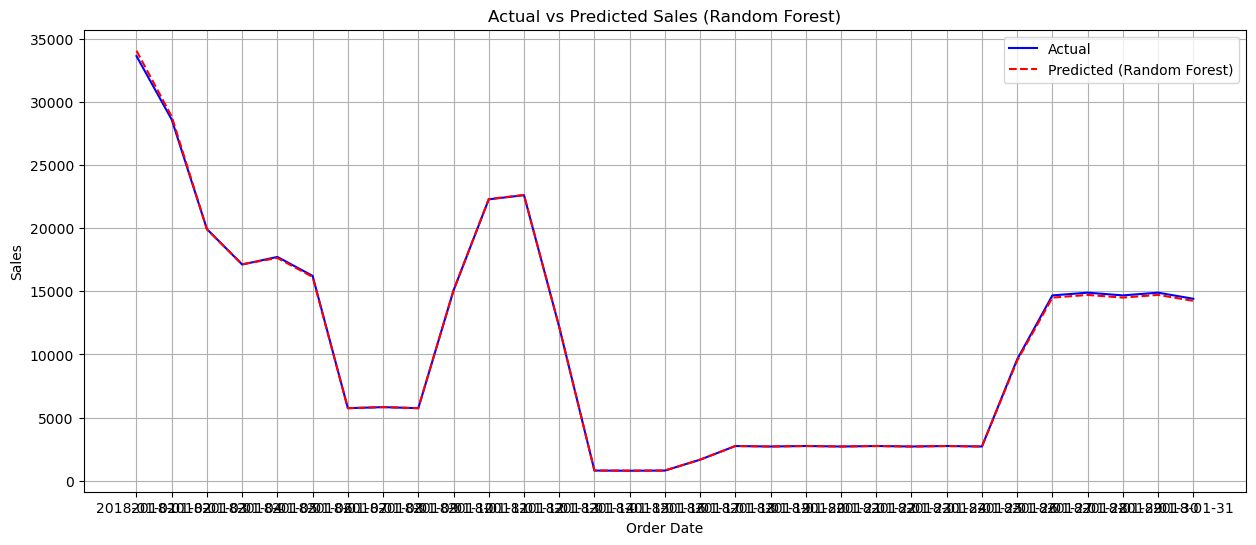

In [30]:
# Plotting actual vs predicted values
plt.figure(figsize=(15, 6))
sns.lineplot(x='Order Date', y='Actual', data=rf_summed_data, label='Actual', color='blue')
sns.lineplot(x='Order Date', y='Predicted', data=rf_summed_data, label='Predicted (Random Forest)', color='red', linestyle='--')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

##### XGBoost

In [31]:
# Initializing the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Training the model
xgb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_model.predict(X_test)

# Create a DataFrame with actual and predicted values for the test set
xgb_actual_vs_predicted_test = pd.DataFrame({'Actual': test_data['Sales'], 'Predicted': y_pred})
xgb_actual_vs_predicted_test['Order Date'] = test_data['Order Date']

# Summing up the predicted sales data according to order dates
xgb_summed_data = rf_actual_vs_predicted_test.groupby('Order Date').agg({'Actual': 'sum', 'Predicted': 'sum'}).reset_index()

# Printing the summed data
print(xgb_summed_data)

# Calculating evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (XGBoost): {mae_xgb}')
print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'Root Mean Squared Error (XGBoost): {rmse_xgb}')
print(f'R-squared (XGBoost): {r2_xgb}')

    Order Date        Actual     Predicted
0   2018-01-01  33638.041077  34060.904709
1   2018-01-02  28603.660887  28845.864511
2   2018-01-03  19926.720578  19907.421226
3   2018-01-04  17121.240264  17145.397151
4   2018-01-05  17724.199585  17640.533593
5   2018-01-06  16222.349655  16137.840160
6   2018-01-07   5739.200104   5739.201502
7   2018-01-08   5823.600106   5823.581103
8   2018-01-09   5739.200104   5739.245602
9   2018-01-10  15070.900047  15077.931416
10  2018-01-11  22287.000000  22307.783647
11  2018-01-12  22614.750000  22635.466737
12  2018-01-13  12168.279999  12181.431063
13  2018-01-14    796.259997    802.331997
14  2018-01-15    784.719997    790.703997
15  2018-01-16    796.259997    802.331997
16  2018-01-17   1659.229999   1662.259798
17  2018-01-18   2742.750000   2742.297600
18  2018-01-19   2703.000000   2702.660700
19  2018-01-20   2742.750000   2742.297600
20  2018-01-21   2703.000000   2702.547600
21  2018-01-22   2742.750000   2742.297600
22  2018-01

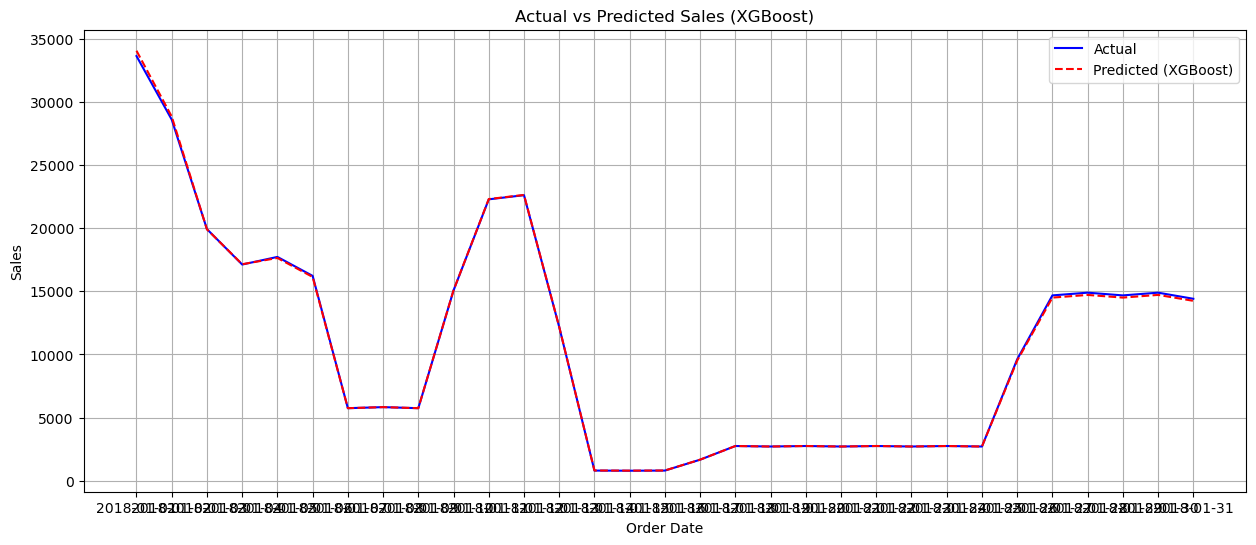

In [32]:
# Plotting actual vs predicted values for XGBoost
plt.figure(figsize=(15, 6))
sns.lineplot(x='Order Date', y='Actual', data=xgb_summed_data, label='Actual', color='blue')
sns.lineplot(x='Order Date', y='Predicted', data=xgb_summed_data, label='Predicted (XGBoost)', color='red', linestyle='--')
plt.title('Actual vs Predicted Sales (XGBoost)')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

##### LSTM

In [33]:
y_train = pd.to_numeric(y_train, errors='coerce')

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM input (samples, time steps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_reshaped)
y_pred = y_pred.flatten()

# Create a DataFrame with actual and predicted values for the test set
lstm_actual_vs_predicted_test = pd.DataFrame({'Actual': test_data['Sales'], 'Predicted': y_pred})
lstm_actual_vs_predicted_test['Order Date'] = test_data['Order Date']

# Summing up the predicted sales data according to order dates
lstm_summed_data = rf_actual_vs_predicted_test.groupby('Order Date').agg({'Actual': 'sum', 'Predicted': 'sum'}).reset_index()

# Print the summed data
print(lstm_summed_data)

# Calculate evaluation metrics
mae_lstm = mean_absolute_error(y_test, y_pred)
mse_lstm = mean_squared_error(y_test, y_pred)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (LSTM): {mae_lstm}')
print(f'Mean Squared Error (LSTM): {mse_lstm}')
print(f'Root Mean Squared Error (LSTM): {rmse_lstm}')
print(f'R-squared (LSTM): {r2_lstm}')

Epoch 1/50
5575/5575 [==============================] - 38s 6ms/step - loss: 9209.0400
Epoch 2/50
5575/5575 [==============================] - 28s 5ms/step - loss: 2682.6472
Epoch 3/50
5575/5575 [==============================] - 31s 6ms/step - loss: 2329.8704
Epoch 4/50
5575/5575 [==============================] - 30s 5ms/step - loss: 2045.7354
Epoch 5/50
5575/5575 [==============================] - 28s 5ms/step - loss: 1825.1837
Epoch 6/50
5575/5575 [==============================] - 31s 6ms/step - loss: 1649.0883
Epoch 7/50
5575/5575 [==============================] - 28s 5ms/step - loss: 1498.6062
Epoch 8/50
5575/5575 [==============================] - 33s 6ms/step - loss: 1362.2898
Epoch 9/50
5575/5575 [==============================] - 26s 5ms/step - loss: 1241.0909
Epoch 10/50
5575/5575 [==============================] - 30s 5ms/step - loss: 1120.6652
Epoch 11/50
5575/5575 [==============================] - 30s 5ms/step - loss: 1009.7819
Epoch 12/50
5575/5575 [==================

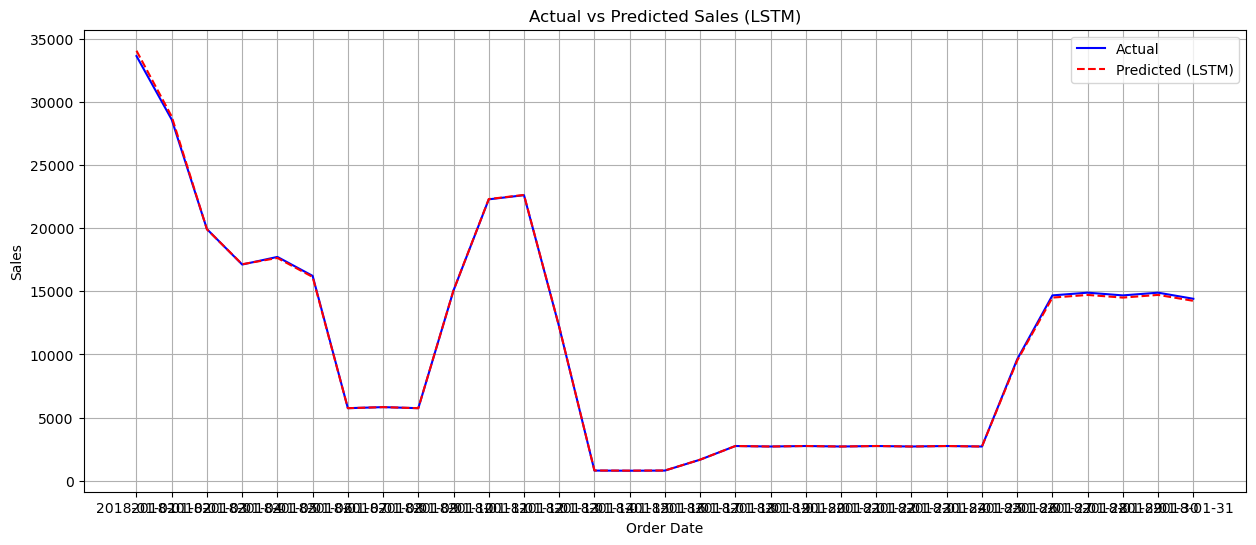

In [34]:
# Plot actual vs predicted values for LSTM
plt.figure(figsize=(15, 6))
sns.lineplot(x='Order Date', y='Actual', data=lstm_summed_data, label='Actual', color='blue')
sns.lineplot(x='Order Date', y='Predicted', data=lstm_summed_data, label='Predicted (LSTM)', color='red', linestyle='--')
plt.title('Actual vs Predicted Sales (LSTM)')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

##### Hybrid Model - Random Forest + XGBoost + LSTM + Meta-model (Linear Regression)

In [35]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Train LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

# Make LSTM predictions
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
lstm_preds = lstm_model.predict(X_test_reshaped)
lstm_preds = lstm_preds.flatten()

# Stack predictions for meta-model
stacked_X = np.column_stack((rf_preds, xgb_preds, lstm_preds))

# Train meta-model (Linear Regression)
meta_model = LinearRegression()
meta_model.fit(stacked_X, y_test)

# Make final predictions
final_preds = meta_model.predict(stacked_X)

# Create a DataFrame with actual and predicted values
actual_vs_stacked = pd.DataFrame({'Actual': y_test, 'RF Predicted': rf_preds, 'XGBoost Predicted': xgb_preds, 'LSTM Predicted': lstm_preds, 'Stacked Predicted': final_preds})

actual_vs_stacked['Order Date'] = test_data['Order Date']

# Summing up the predicted sales data according to order dates
stacked_summed_data = actual_vs_stacked.groupby('Order Date').agg({'Actual': 'sum', 'RF Predicted': 'sum', 'XGBoost Predicted': 'sum', 'LSTM Predicted': 'sum', 'Stacked Predicted': 'sum'}).reset_index()

# Print the summed data
print(stacked_summed_data)

# Evaluate the final model
mae_stacked = mean_absolute_error(y_test, final_preds)
mse_stacked = mean_squared_error(y_test, final_preds)
rmse_stacked = np.sqrt(mse_stacked)
r2_stacked = r2_score(y_test, final_preds)

print(f'Mean Absolute Error (Stacked Model): {mae_stacked}')
print(f'Mean Squared Error (Stacked Model): {mse_stacked}')
print(f'Root Mean Squared Error (Stacked Model): {rmse_stacked}')
print(f'R-squared (Stacked Model): {r2_stacked}')

Epoch 1/50
5575/5575 [==============================] - 12s 2ms/step - loss: 15773.4609
Epoch 2/50
5575/5575 [==============================] - 10s 2ms/step - loss: 6998.0210
Epoch 3/50
5575/5575 [==============================] - 11s 2ms/step - loss: 4195.5874
Epoch 4/50
5575/5575 [==============================] - 16s 3ms/step - loss: 3709.2517
Epoch 5/50
5575/5575 [==============================] - 16s 3ms/step - loss: 3396.0764
Epoch 6/50
5575/5575 [==============================] - 18s 3ms/step - loss: 3170.2832
Epoch 7/50
5575/5575 [==============================] - 16s 3ms/step - loss: 2974.8867
Epoch 8/50
5575/5575 [==============================] - 11s 2ms/step - loss: 2790.4080
Epoch 9/50
5575/5575 [==============================] - 11s 2ms/step - loss: 2579.3984
Epoch 10/50
5575/5575 [==============================] - 10s 2ms/step - loss: 2405.7905
Epoch 11/50
5575/5575 [==============================] - 10s 2ms/step - loss: 2226.8335
Epoch 12/50
5575/5575 [=================

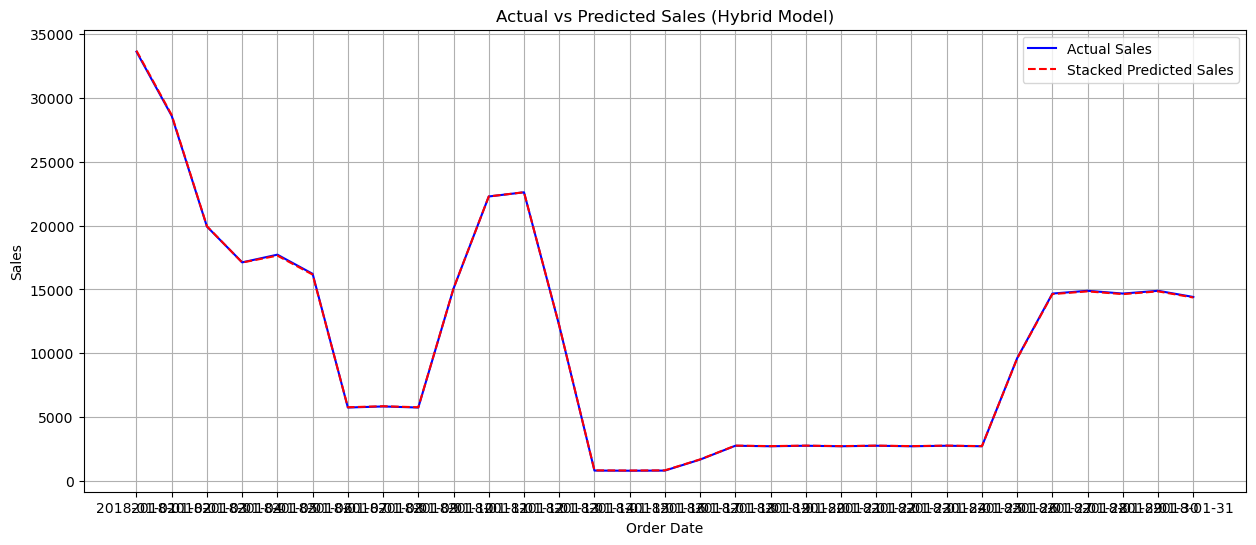

In [36]:
# Plotting actual vs predicted values for Hybrid Model
plt.figure(figsize=(15, 6))
sns.lineplot(x='Order Date', y='Actual', data=stacked_summed_data, label='Actual Sales', color='blue')
sns.lineplot(x='Order Date', y='Stacked Predicted', data=stacked_summed_data, label='Stacked Predicted Sales', color='red', linestyle='--')
plt.title('Actual vs Predicted Sales (Hybrid Model)')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### Model Deployment 

In [ ]:
import pickle

# Save the trained models and relevant information
models_info = {
    'rf_model': rf_model,
    'xgb_model': xgb_model,
    'lstm_model': lstm_model,
    'meta_model': meta_model,
}

with open('deployed_model.pkl', 'wb') as file:
    pickle.dump(models_info, file)